## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
1.  Which variables are significant in predicting the price of a house, and
2.  How well those variables describe the price of a house

### Data Understanding

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Ml Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the housing dataset
housing_data = pd.read_csv("train.csv", na_values="NAN")

In [3]:
#checking the data
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#checking the shape of the data
housing_data.shape

(1460, 81)

In [5]:
#summary of the data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dataset has 1460 records with 81 features. 

### Data Cleaning

In [6]:
#summary of the data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Checking the above features with data dictionary provided, we can see that there are few features which needs to be converted to categorical variables and few features which needs to be converted to numerical variables.

Features 'MSSubClass', 'OverallQual', 'OverallCond' are categorical variables but are in numerical format. We need to convert them to categorical variables.  
Features 'LotFrontage', 'MasVnrArea', are numerical variables but are in object format. We need to convert them to numerical variables.

In [7]:
#Converting the data type of the columns

#converting the data type of above mentioned columns to object
housing_data[['MSSubClass', 'OverallQual', 'OverallCond']] = housing_data[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

#Converting the data type of above mentioned columns to numeric
housing_data[['LotFrontage', 'MasVnrArea']] = housing_data[['LotFrontage', 'MasVnrArea']].astype('float64')

In [8]:
#Checking the data type of the five columns
housing_data[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [9]:
#Calculating the percentage of missing values
total = housing_data.isnull().sum().sort_values(ascending=False)
percent = (housing_data.isnull().sum()/len(housing_data)*100).sort_values(ascending=False)

#concatenating the total and percent
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#displaying the missing values
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


We have 19 features with missing values. Some of the features have NaN values which are treated as missing values. We will check whether these NaN values are missing values or not. If they are missing values, we will impute them with appropriate values. If they are not missing values, we will replace it with "None" value. 

On checking the data description, we found that the missing values in the following features are not missing values. We will replace them with "None" value. The features are:
1. Alley - Type of alley access to property
2. BsmtQual - Evaluates the height of the basement
3. BsmtCond - Evaluates the general condition of the basement
4. BsmtExposure - Refers to walkout or garden level walls
5. BsmtFinType1 - Rating of basement finished area
6. BsmtFinType2 - Rating of basement finished area (if multiple types)
7. FireplaceQu - Fireplace quality
8. GarageType - Garage location
9. GarageFinish - Interior finish of the garage
10. GarageQual - Garage quality
11. GarageCond - Garage condition
12. PoolQC - Pool quality
13. Fence - Fence quality
14. MiscFeature - Miscellaneous feature not covered in other categories


In [10]:
#Features where NA means not present rather than missing
null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [11]:
#imputing NaN value for the above features to None
for col in null_has_meaning:
    housing_data[col].fillna("None", inplace=True)

In [12]:
#checking the data after imputing the None values
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

There are still some features with missing values. Let’s check the features with missing values.

In [13]:
#Calculating the percentage of missing values
total = housing_data.isnull().sum().sort_values(ascending=False)
percent = (housing_data.isnull().sum()/len(housing_data)*100).sort_values(ascending=False)

#concatenating the total and percent
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#displaying the missing values
missing_data.head(10)

,Total,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
KitchenQual,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000


We will drop LotFrontage feature as it has 259 missing values which is 17.74% of the total records. We will impute the missing values in the remaining features with appropriate values.

In [14]:
#Dropping the LotFrontage feature
housing_data.drop("LotFrontage", axis=1, inplace=True)

GarageYrBlt and MasVnrArea are numerical features. We will impute the missing values with median value. MasVnrType is a categorical feature. We will impute the missing values as None.

In [15]:
#Impuation of missing values
housing_data["MasVnrType"].fillna("None", inplace=True)
housing_data["MasVnrArea"].fillna(housing_data["MasVnrArea"].median(), inplace=True)
housing_data["GarageYrBlt"].fillna(housing_data["GarageYrBlt"].median(), inplace=True)

In [16]:
#Checking the number of missing values after imputation
(housing_data.isnull().sum()).sort_values(ascending=False).head(10)

Electrical      1
MSSubClass      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
dtype: int64

Since only one record has missing value in Electrical feature, we will drop that record.

In [17]:
#dropping the one row with missing Electrical value
housing_data.dropna(inplace=True)

In [18]:
#Checking the number of missing values after imputation
(housing_data.isnull().sum()).sort_values(ascending=False).head(10)

Id              0
MSSubClass      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
dtype: int64

All the missing values are treated. We have 1460 records with 81 features. We will perform further analysis on this data.

### Data Exploration

In [19]:
#Checking the types of features
types = housing_data.dtypes
num_features = types[(types == float) | (types == 'int64')]
cat_features = types[(types == object)]

print("Numerical Features: ", num_features.index)
print("Categorical Features: ", cat_features.index)

Numerical Features:  Index(['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical Features:  Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtF

In [20]:
#checking the count of variable types
print("Numerical Features Count: ", len(num_features.index))
print("Categorical Features Count: ", len(cat_features.index))

#Checking the value counts of different types of features
types.value_counts()

Numerical Features Count:  34
Categorical Features Count:  46


object     46
int64      32
float64     2
dtype: int64

In [21]:
#converting the numerical features and categorical features to list
numerical_features_list = num_features.index.tolist()
categorical_features_list = cat_features.index.tolist()

#checking the numerical features
print("numerical_features: ", numerical_features_list)

#checking the categorical features
print("categorical_features: ", categorical_features_list)

numerical_features:  ['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
categorical_features:  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garag

We have used sweetviz library to perform data exploration. We have generated a report using sweetviz library. The report is saved in the file "Housing_Report.html". The generated report contains various information such as data summary, missing values, duplicate rows,etc.

In [22]:
#Auto EDA
import sweetviz as sv
housing_report = sv.analyze(housing_data, pairwise_analysis='off')
housing_report.show_html('Housing_report.html')

Feature: SalePrice                           |██████████| [100%]   00:35 -> (00:00 left)


Report Housing_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Visualizing the target variable

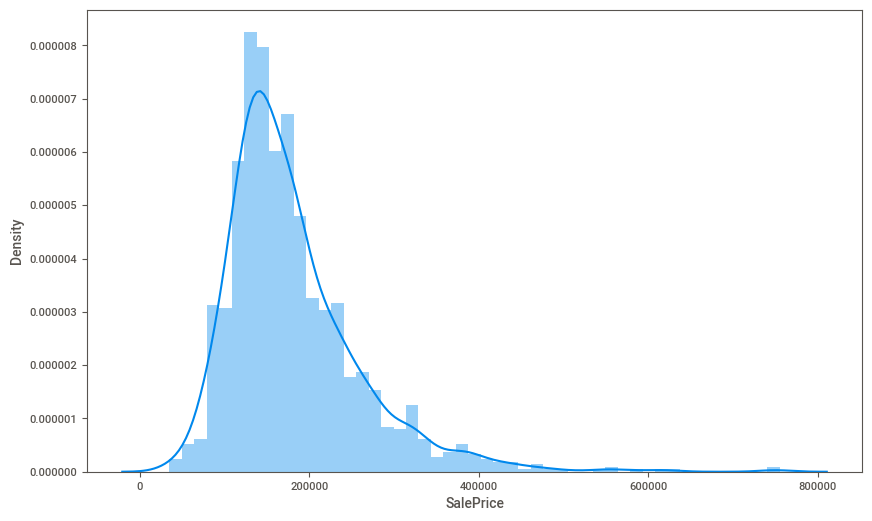

In [23]:
#Plotting the target variable - SalePrice
plt.figure(figsize=(10,6))
sns.distplot(housing_data['SalePrice'])
plt.show()


The target variable Salesprice is right skewed. We will apply log transformation to make it normally distributed.Machine learning algorithms work better with normally distributed data. By applying log transformation, we are reducing the skewness of the data, thus boosting the performance of the machine learning model.

In [24]:
#applying log transformation to the target variable
housing_data["TransformedPrice"] = np.log(housing_data["SalePrice"])

<Axes: xlabel='TransformedPrice', ylabel='Density'>

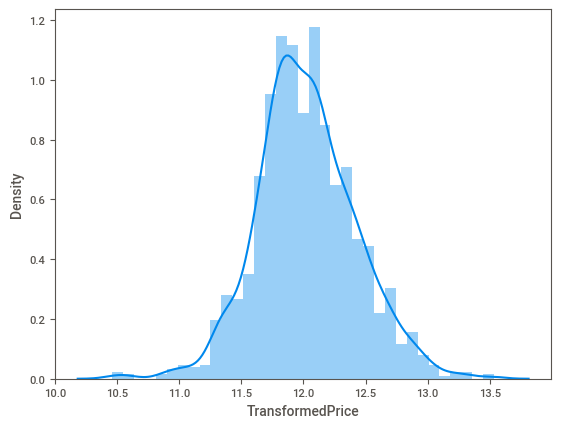

In [25]:
#plottting the transformed target variable
sns.distplot(housing_data["TransformedPrice"])

#### Uni-variate Analysis on Numerical Features

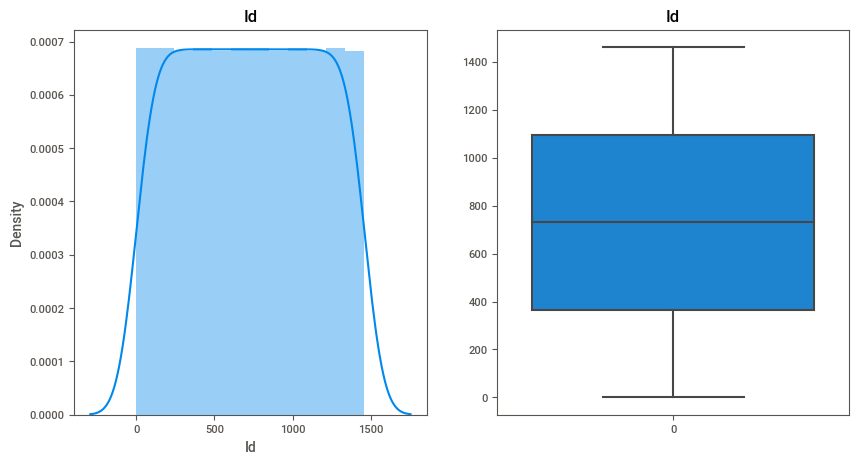

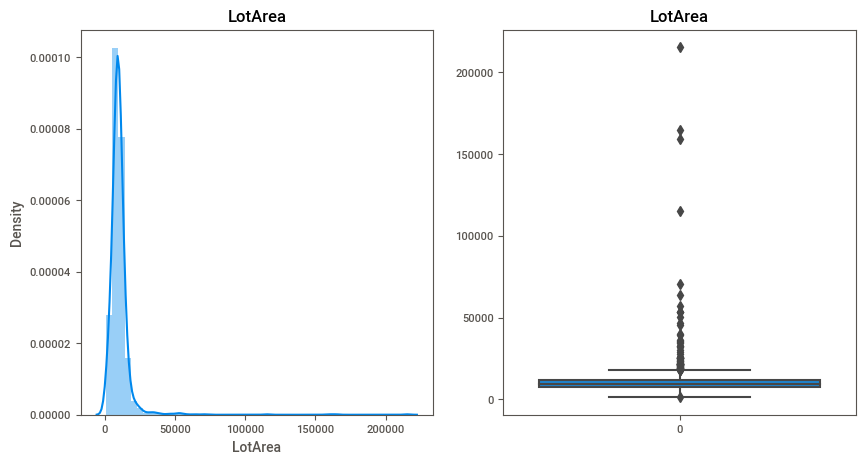

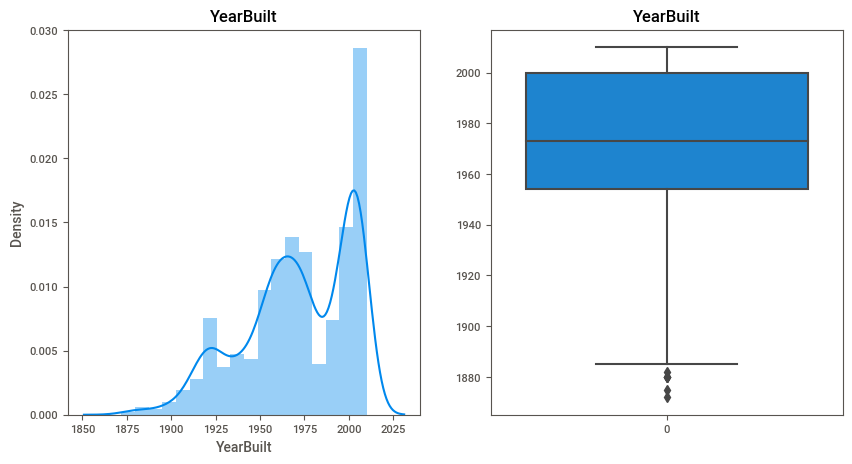

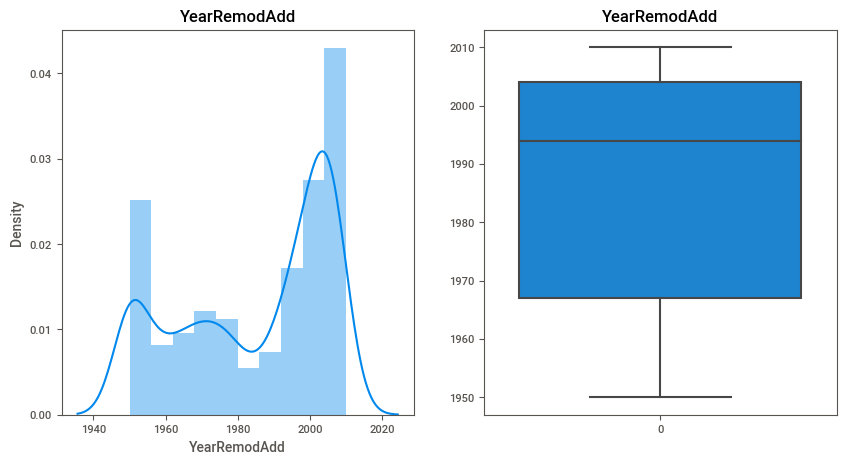

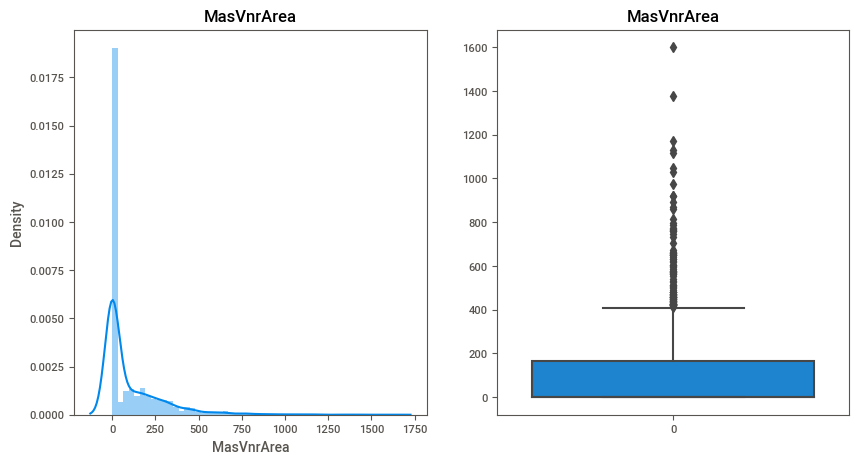

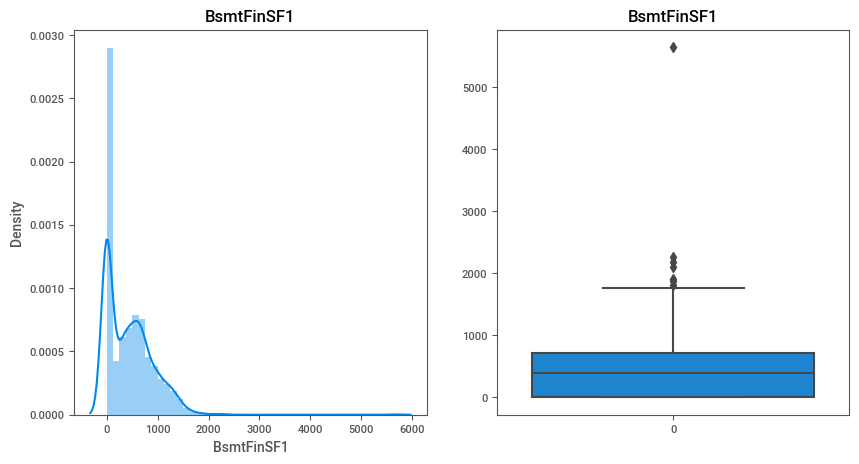

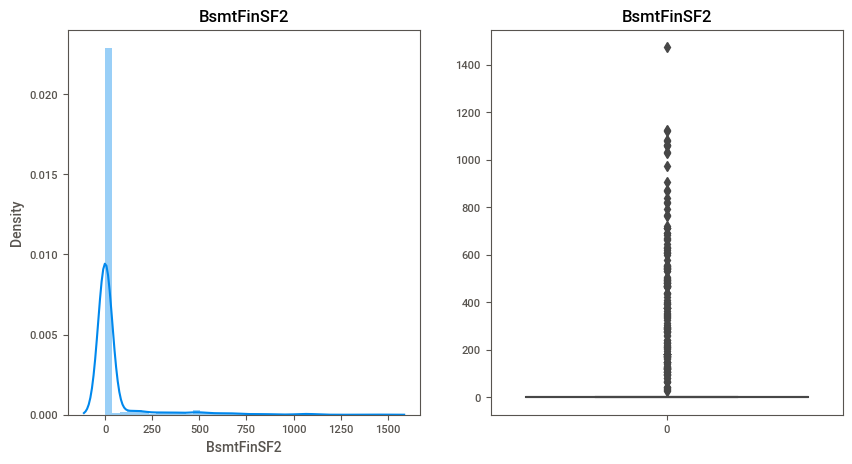

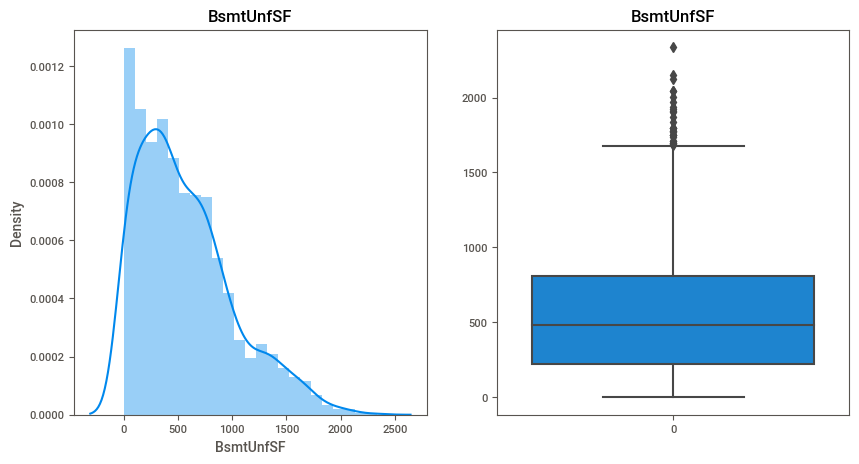

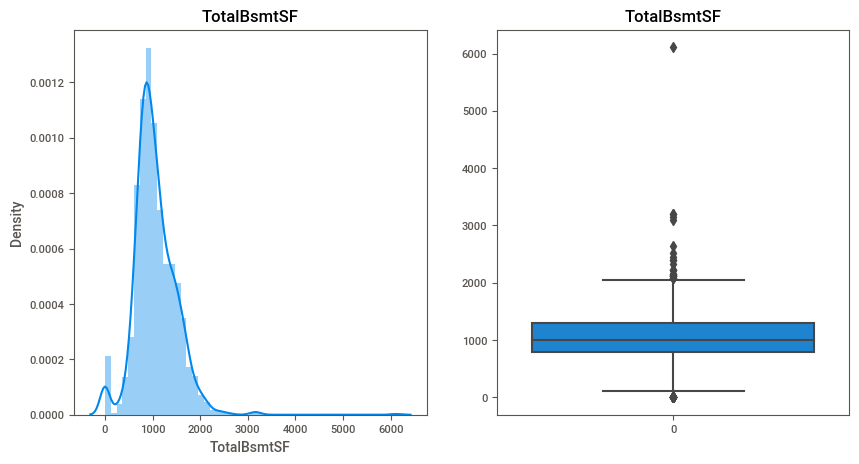

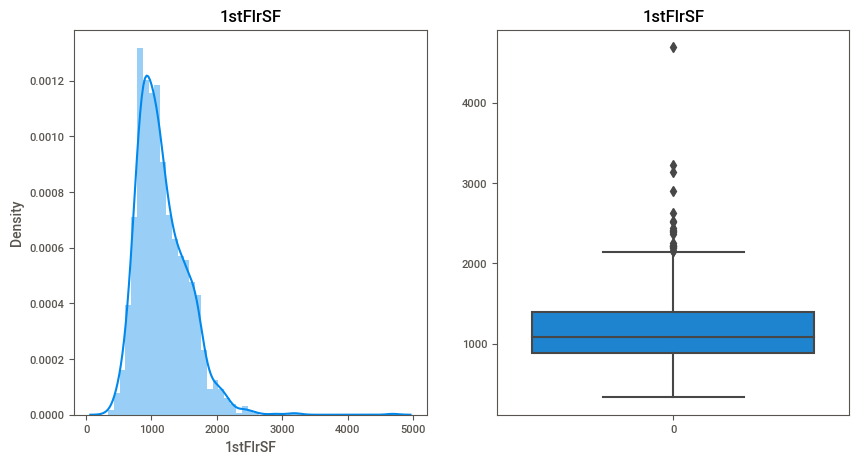

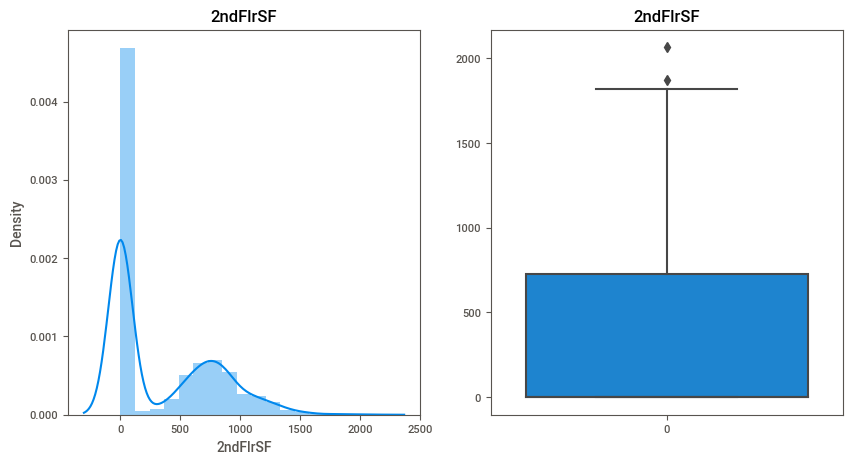

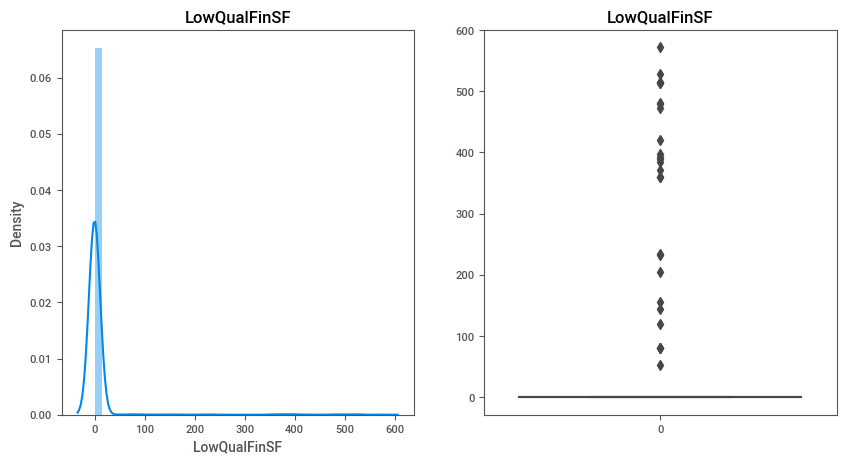

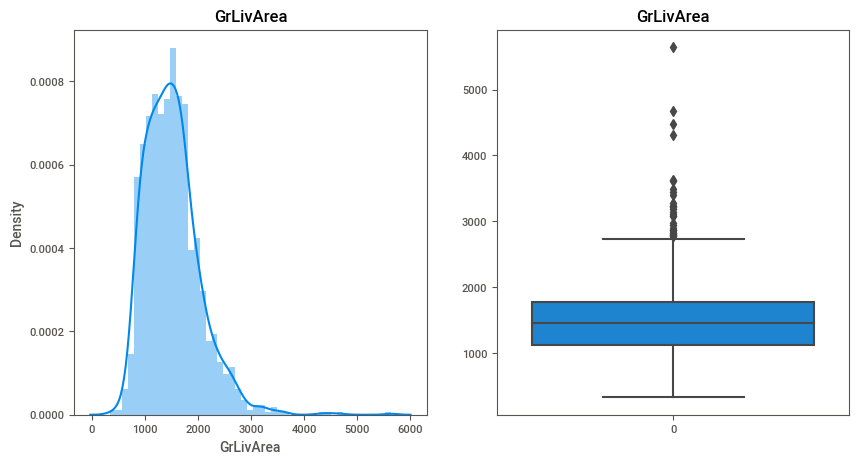

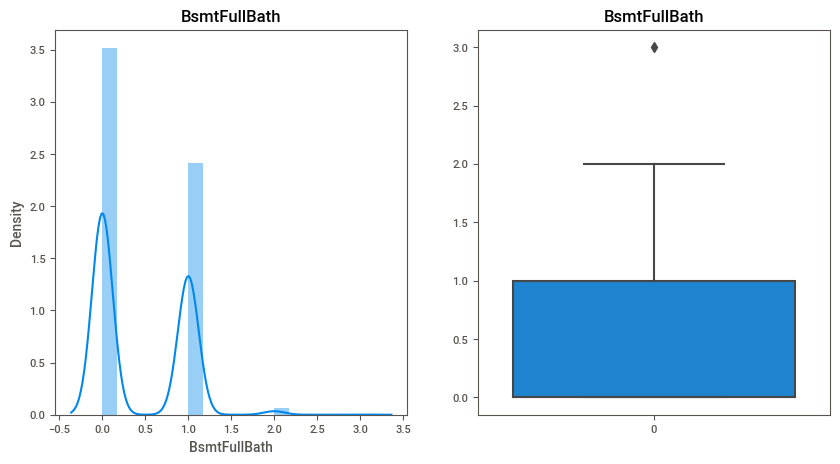

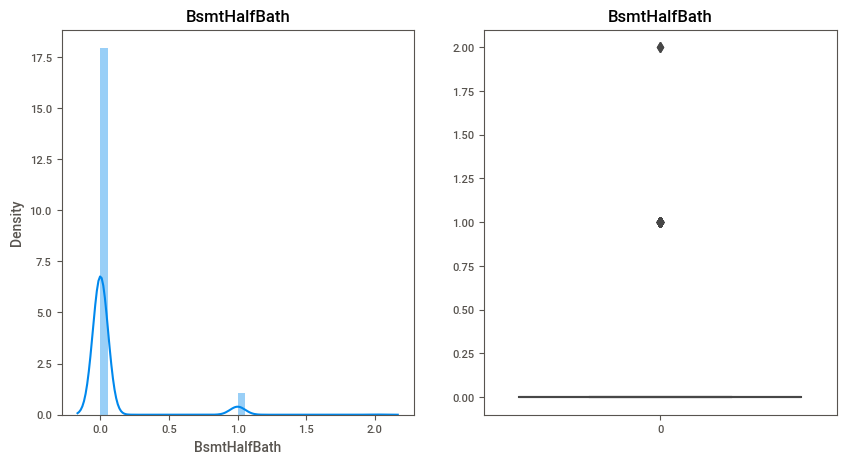

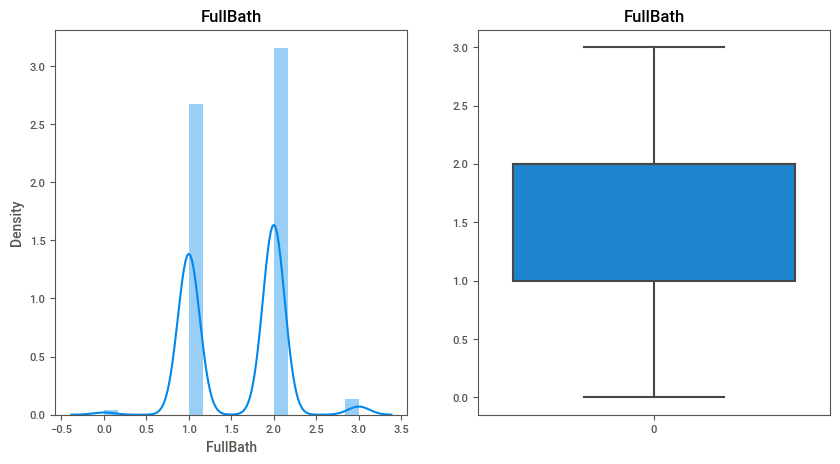

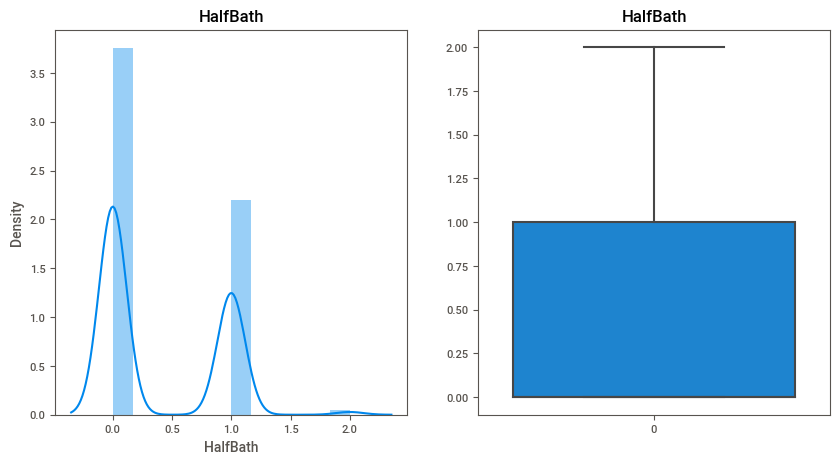

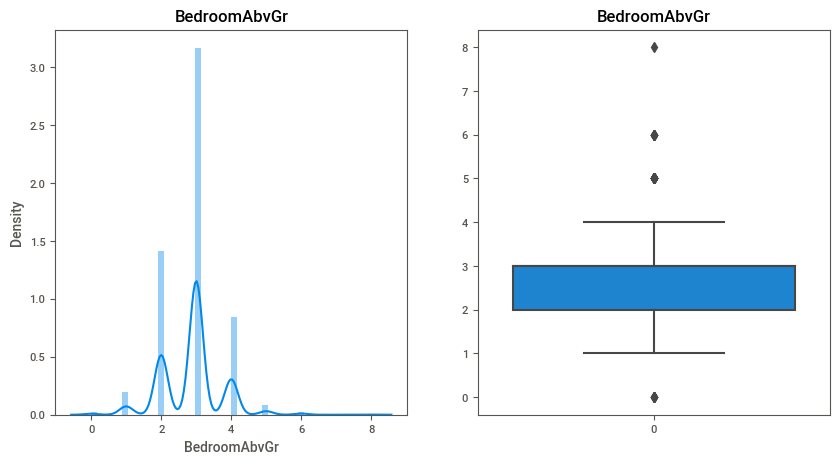

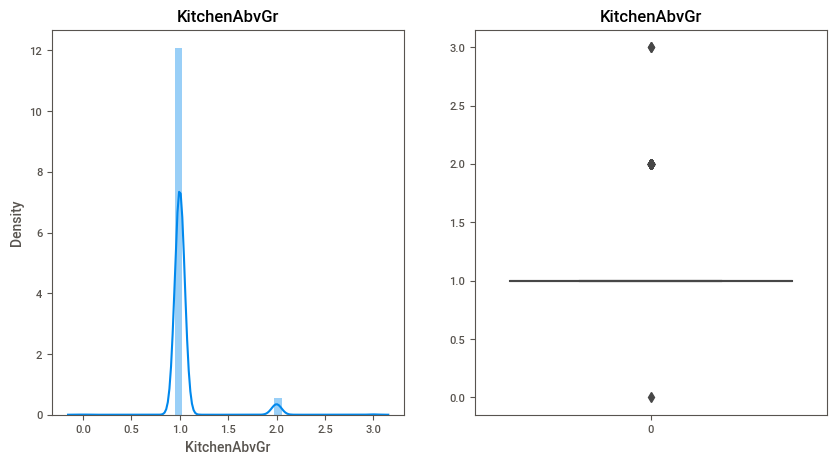

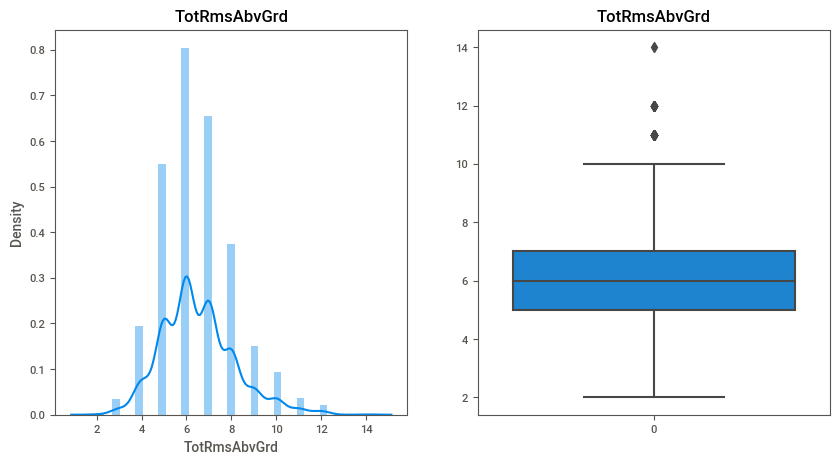

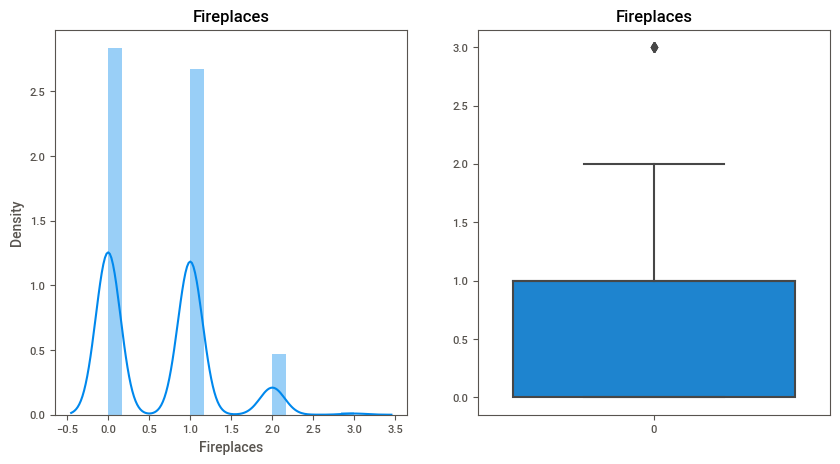

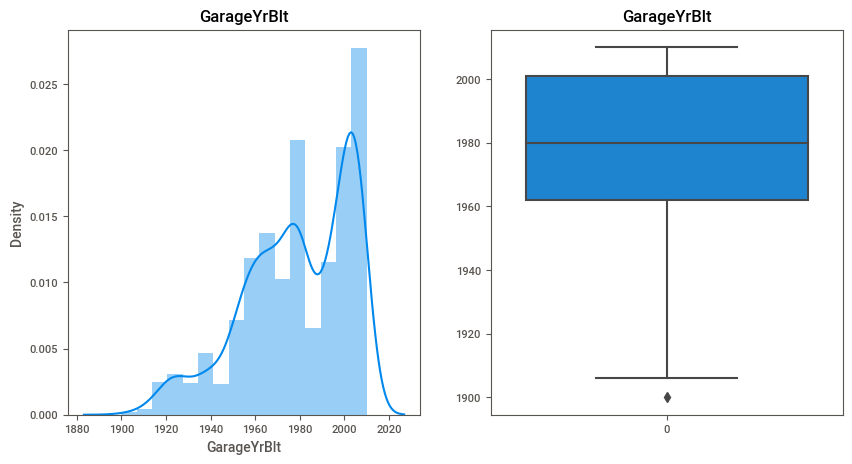

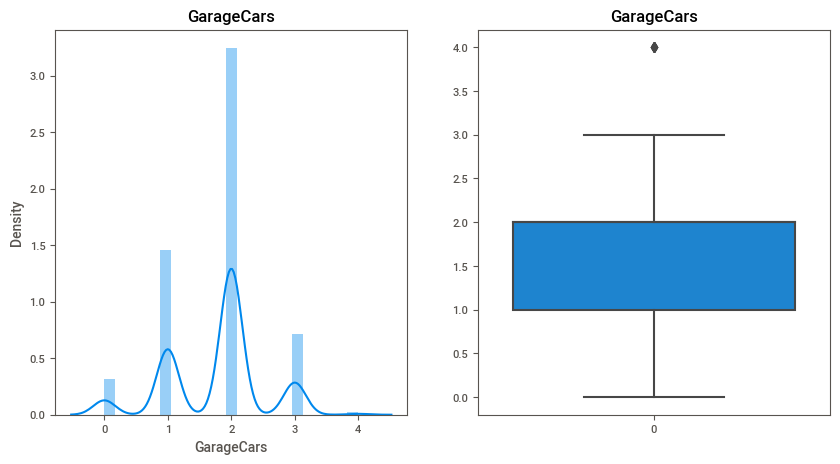

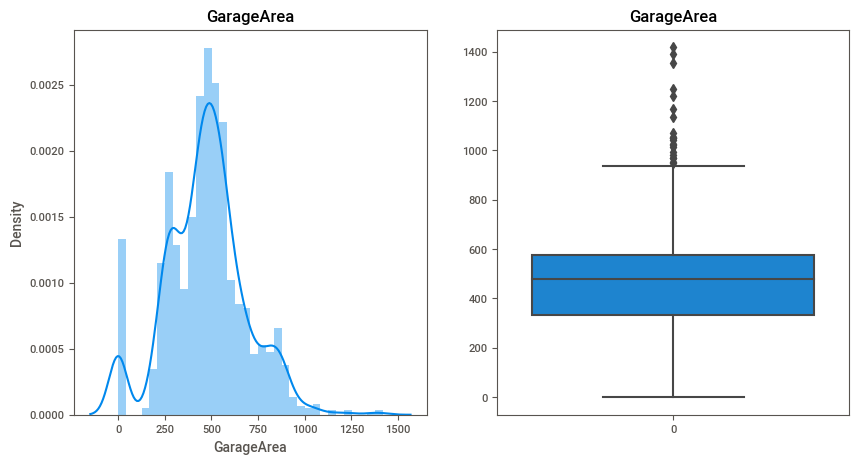

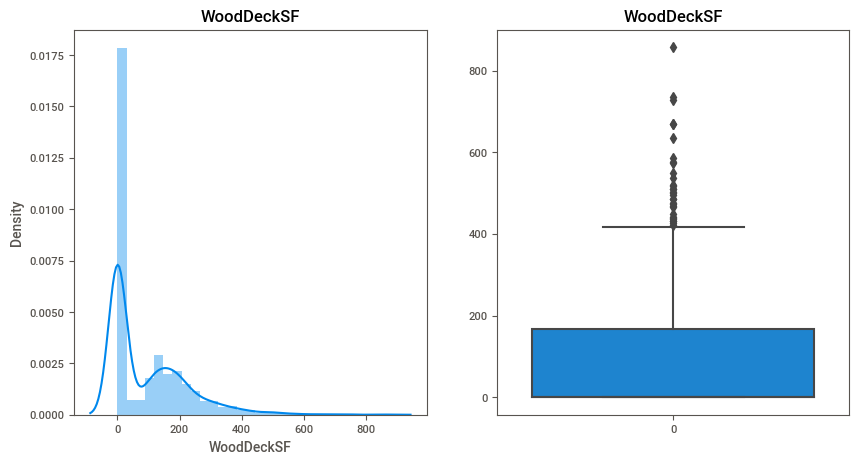

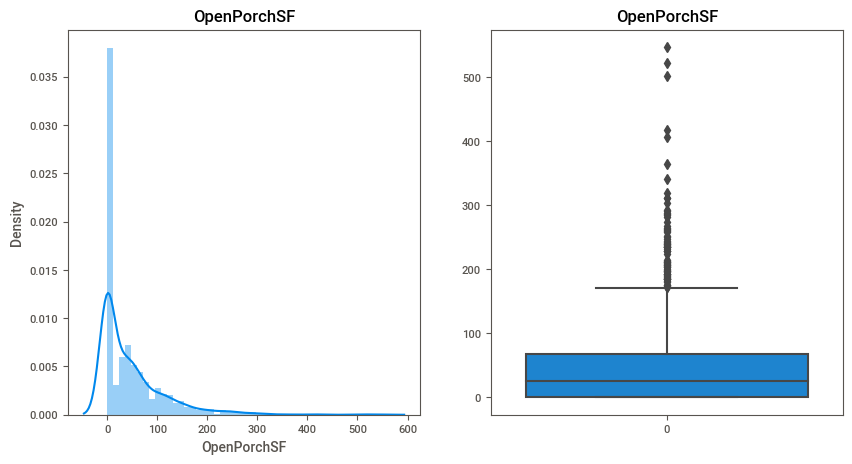

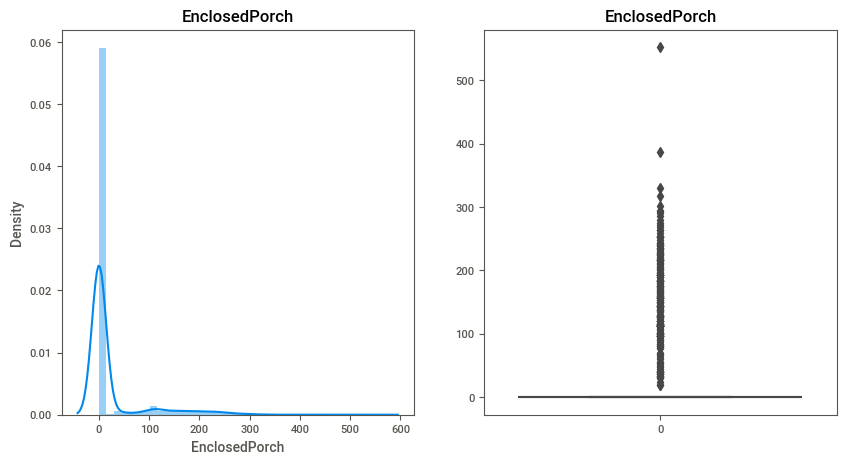

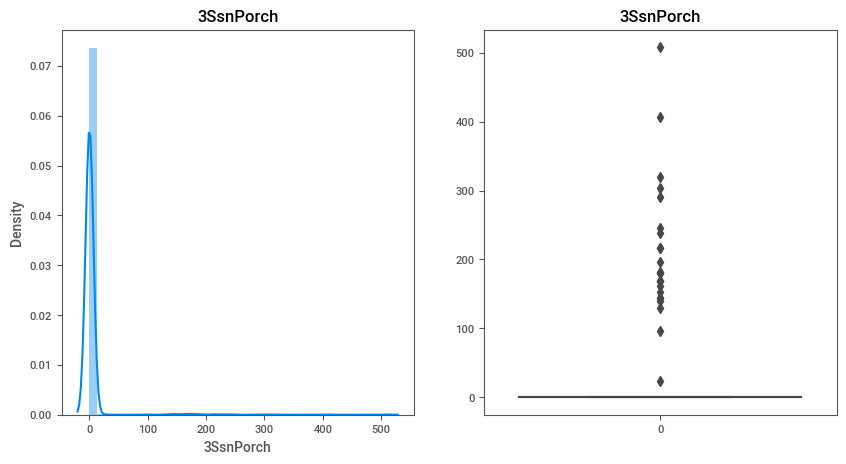

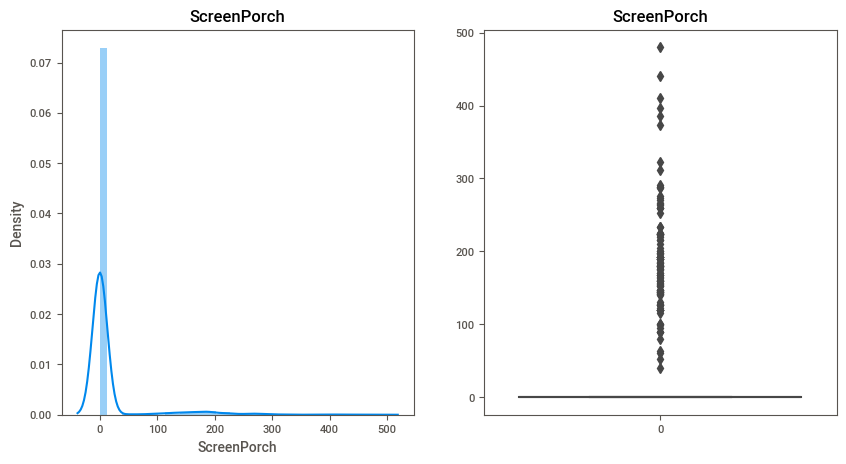

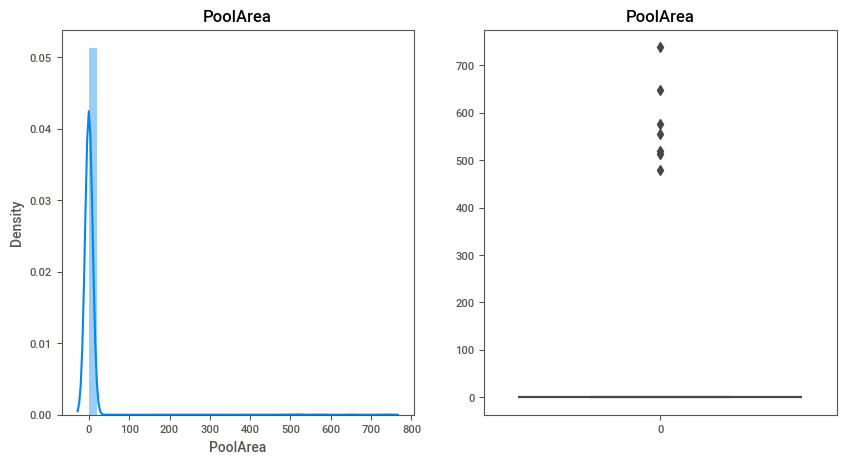

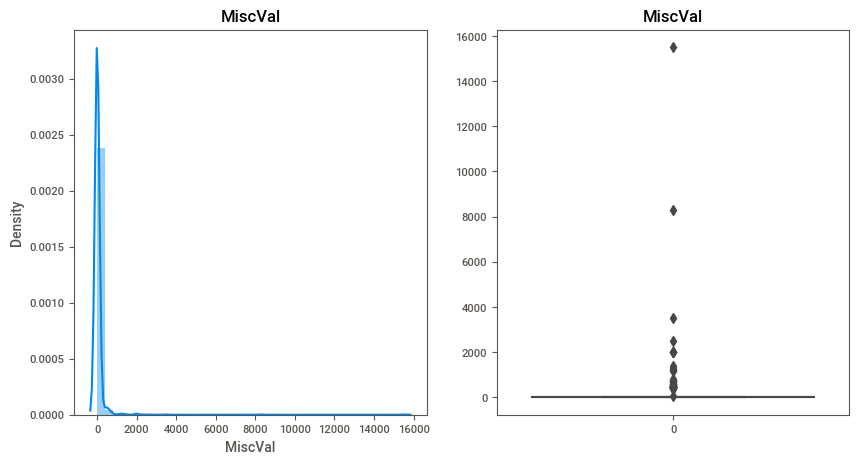

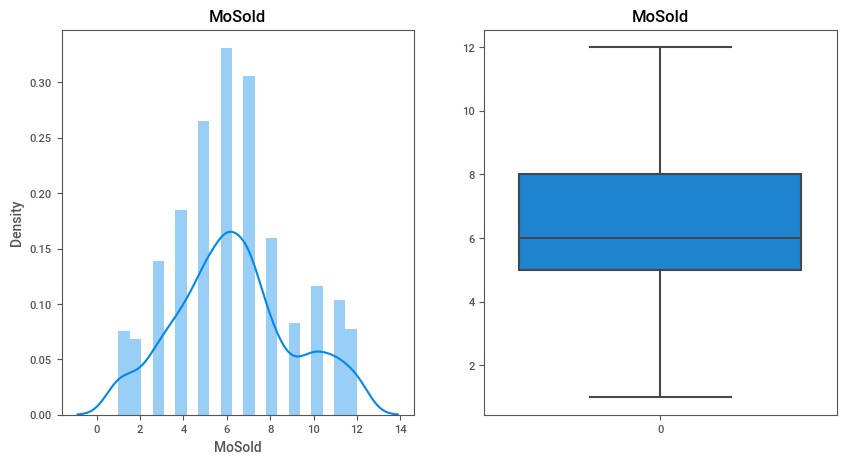

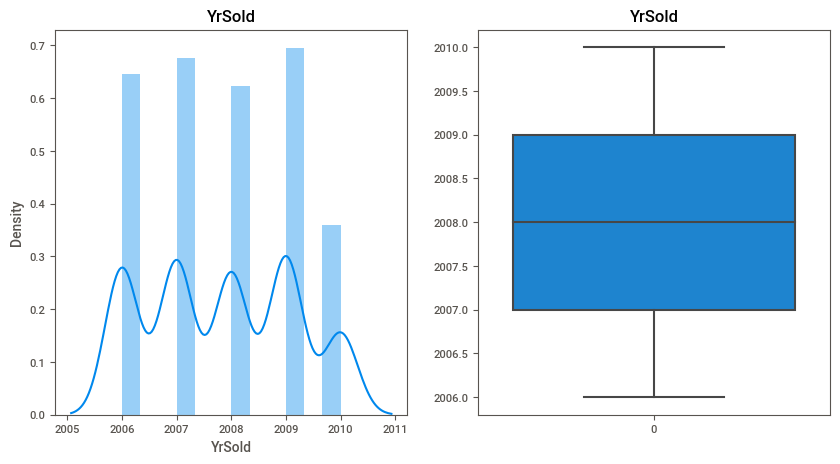

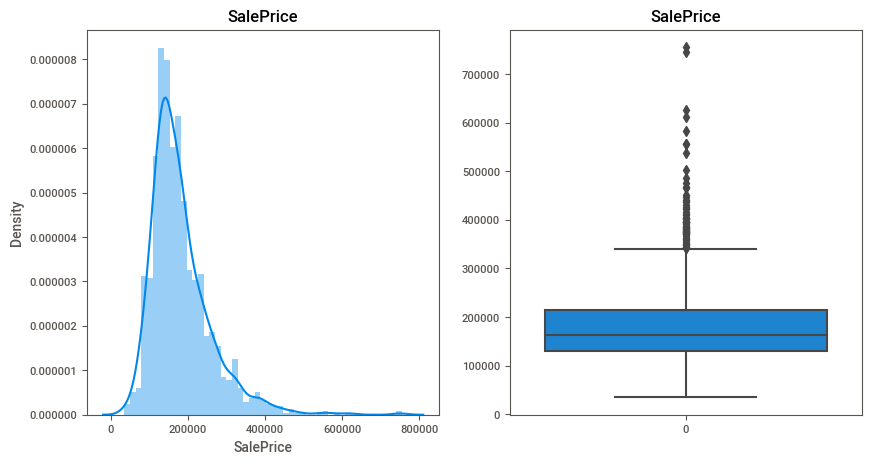

In [26]:
#plottting the numerical features
for feature in numerical_features_list:
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    sns.distplot(housing_data[feature])
    plt.title(feature)

    plt.subplot(1,2,2)
    sns.boxplot(housing_data[feature])
    plt.title(feature)

From above plot, it is observed many features are skewed and have outliers. We will treat the outliers later in the analysis.

We can refer to the sweetviz report for uni-variate analysis on categorical features. 

In [27]:
#Checking the value counts of categorical features and check if any feature has only one value
for feature in categorical_features_list:
    if len(housing_data[feature].value_counts()) == 1:
        print(feature)

No feature has been printed thus indicating no feature needs to be dropped on basis of having constant value.

#### Bi-variate Analysis on Numerical Features

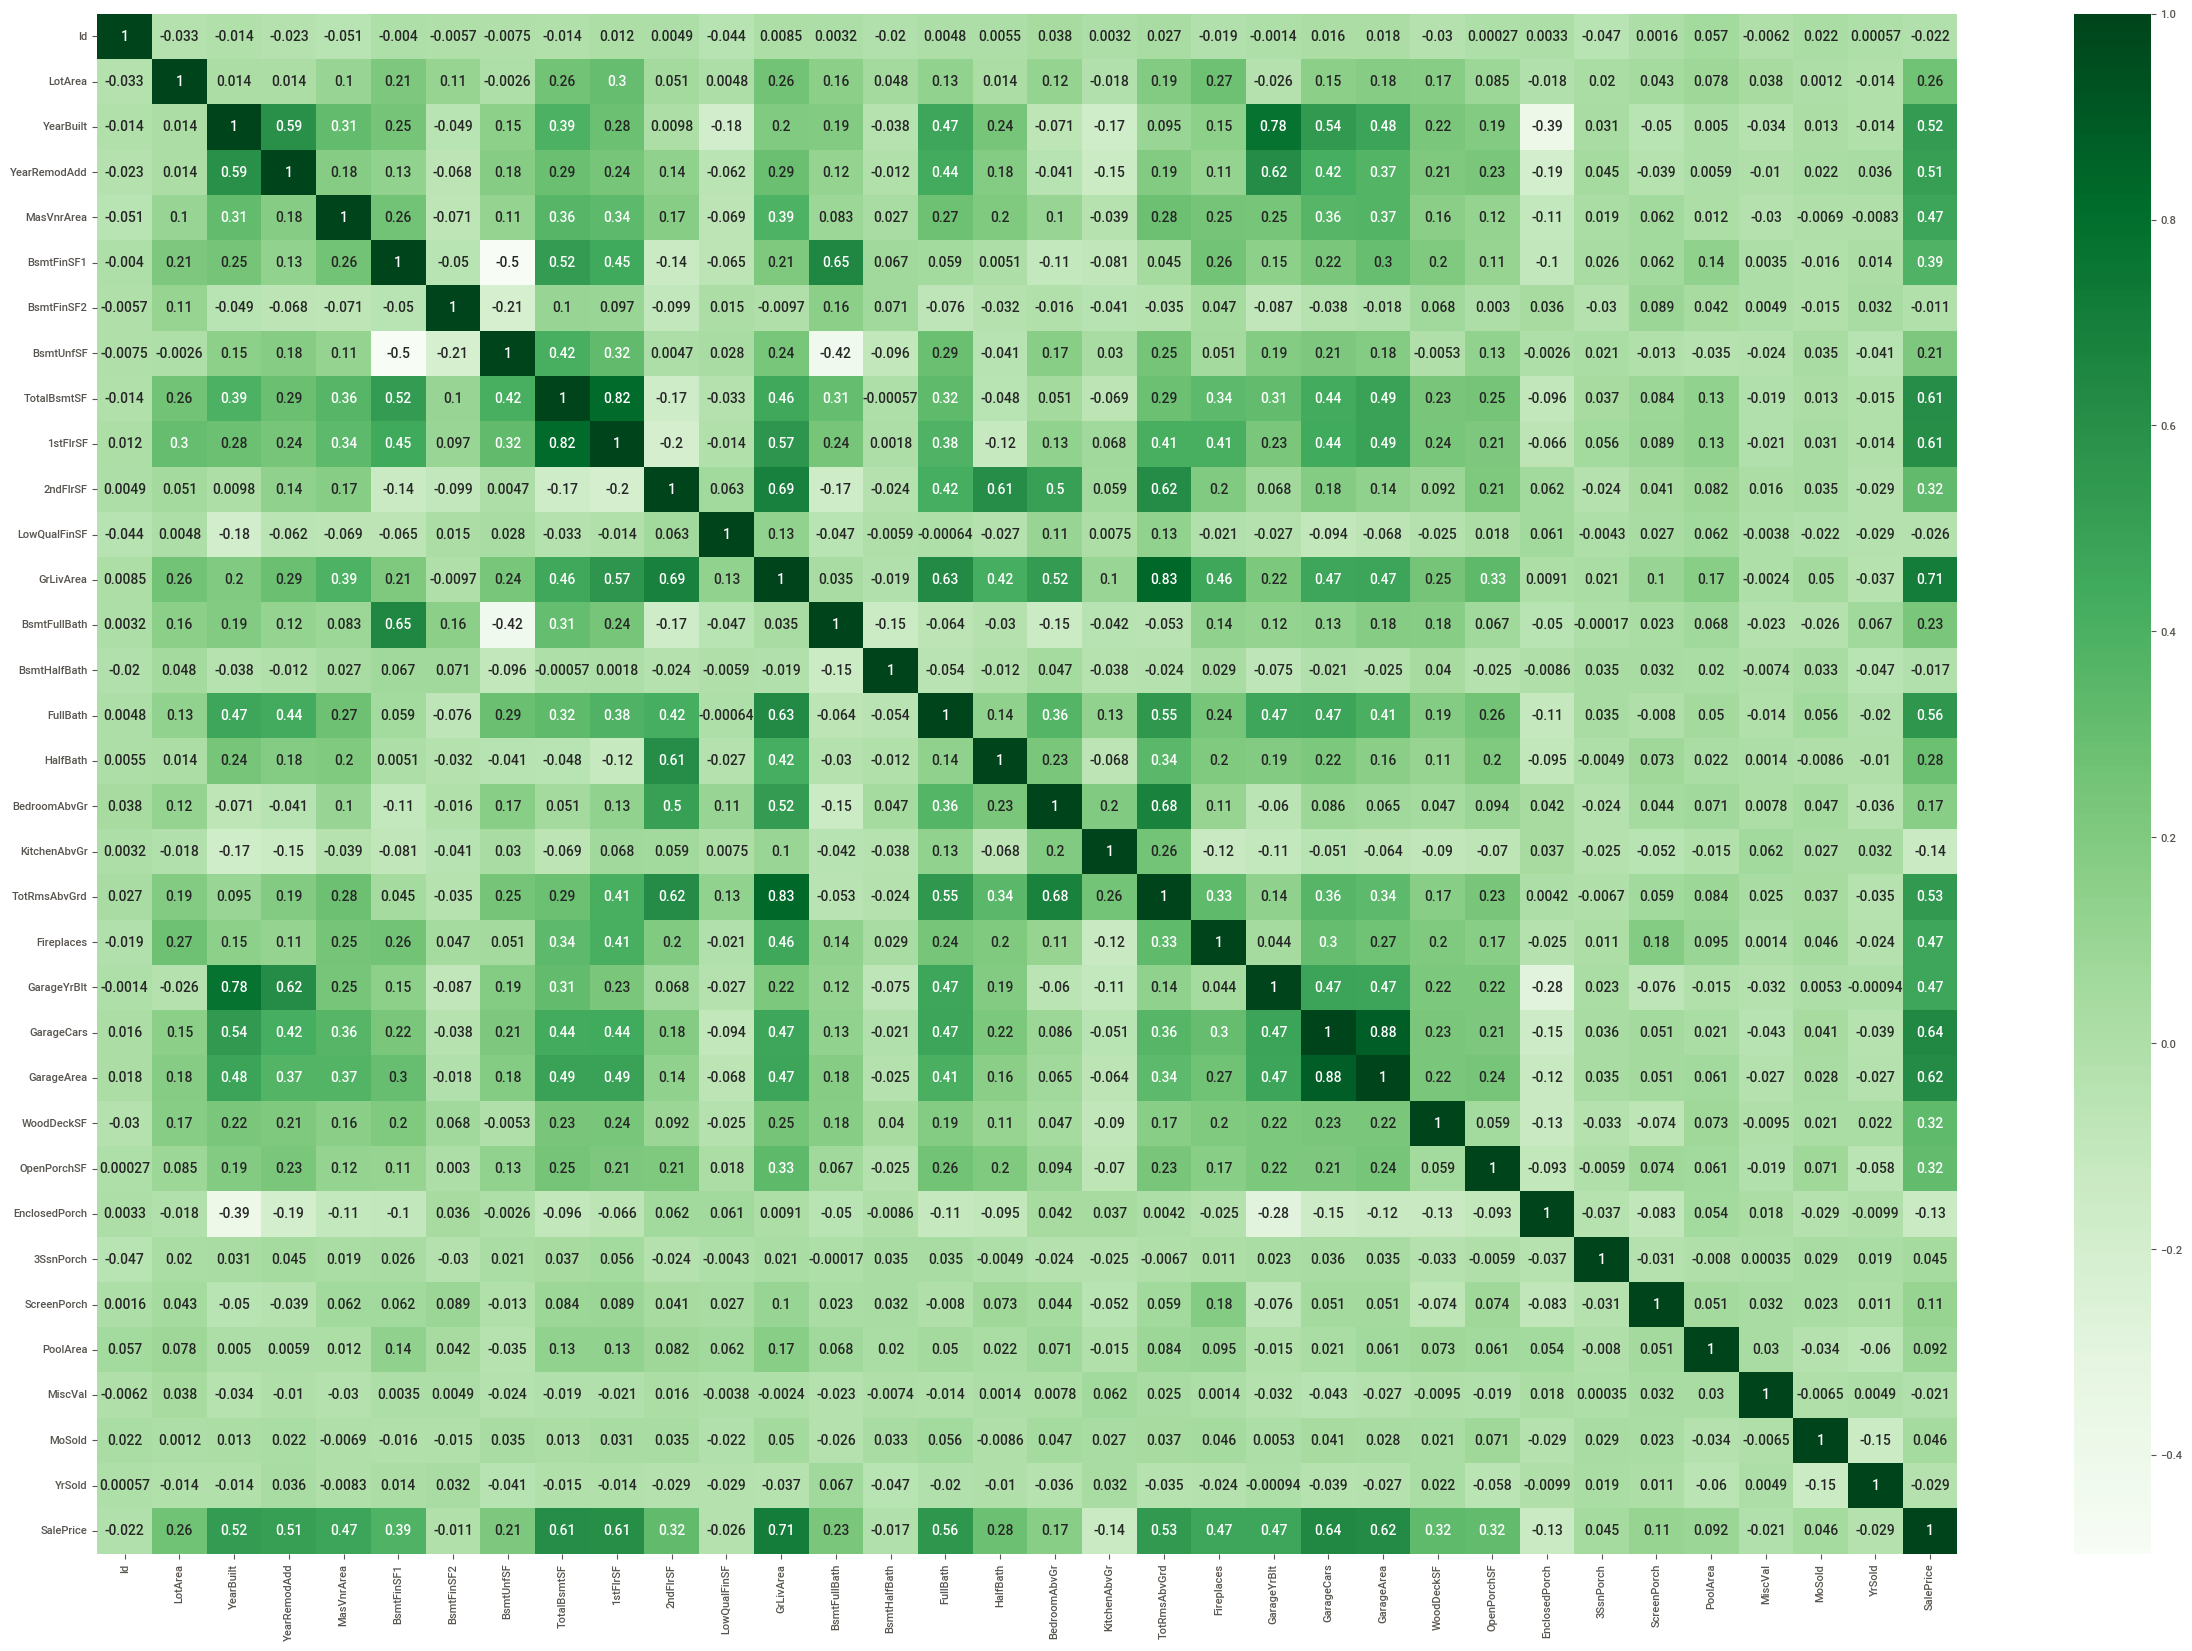

In [28]:
#plotting the correlation matrix
plt.figure(figsize=(30,20))
sns.heatmap(housing_data[numerical_features_list].corr(), annot=True, cmap="Greens")
plt.show()

From the above heatmap, we can observe that many features are correlated with each other. Since we are using regularization, we will not drop any feature on basis of correlation.

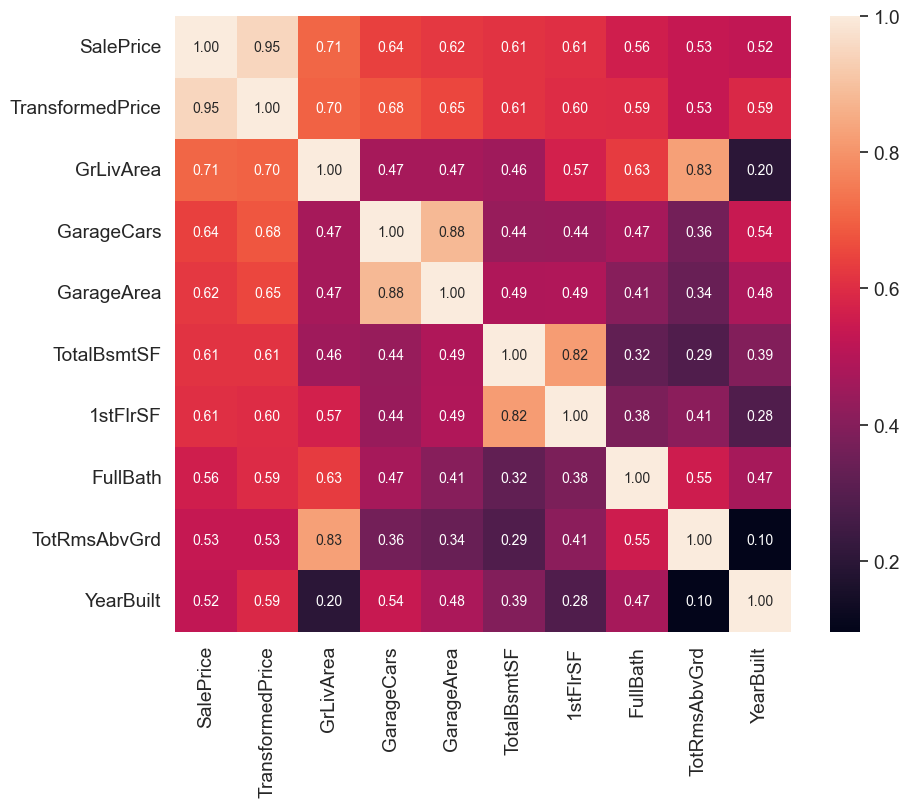

In [29]:
#plotting the correlation matrix wih target variable
plt.figure(figsize=(10,8))
k = 10 #number of variables for heatmap
cols = housing_data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The heatmap shows the top 10 features which are correlated with the target variable. The GrLivArea, GarageCars, GarageArea features are the top 3 features which are correlated with the target variable.

#### Outlier Treatment

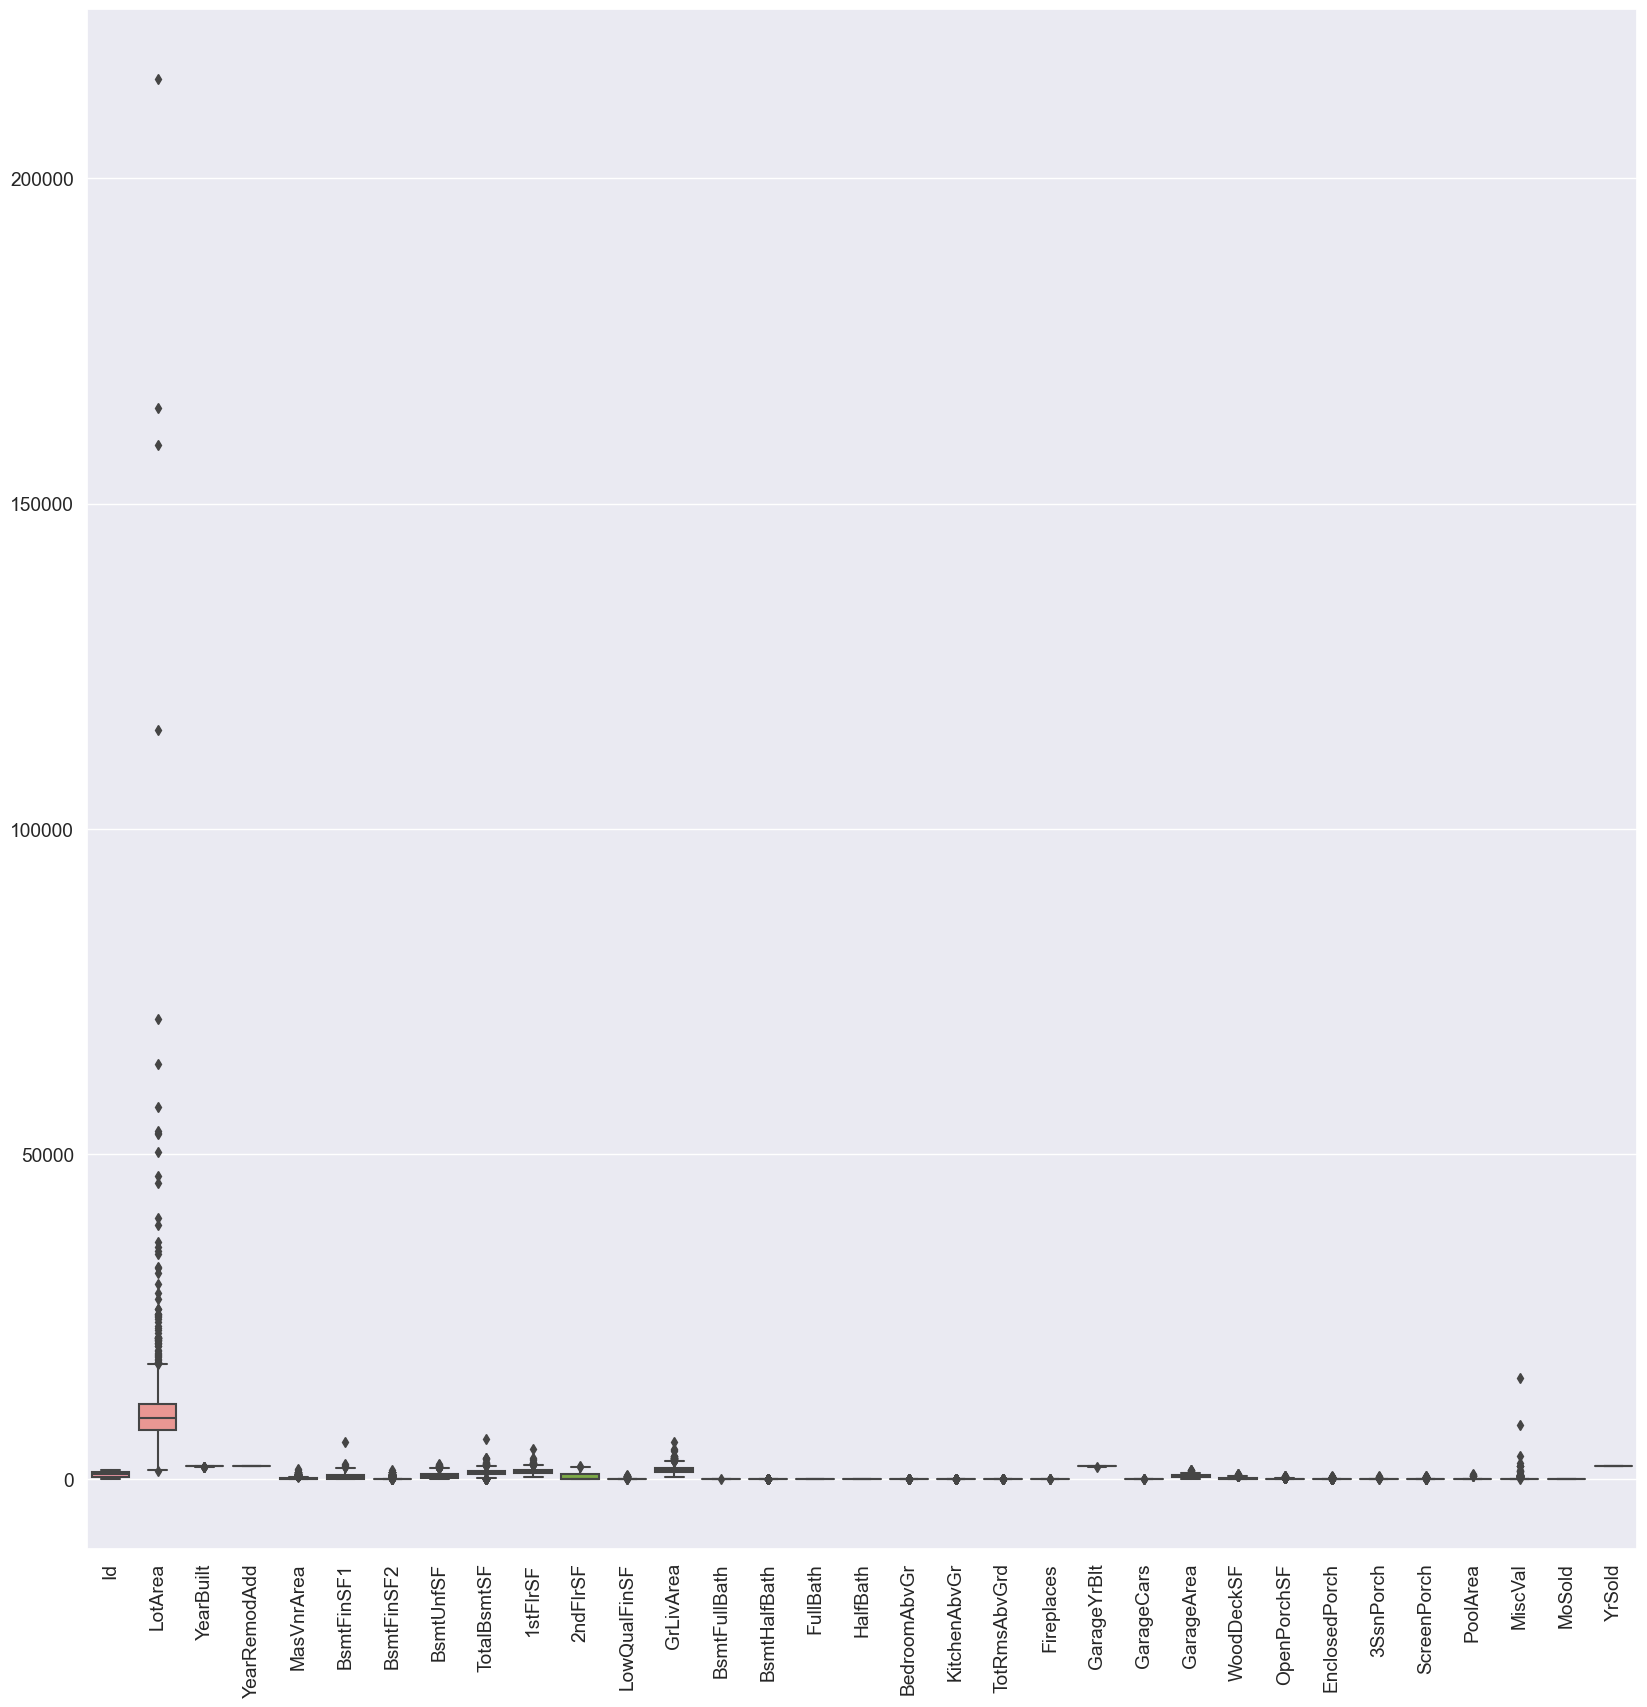

In [30]:
numerical_features_list_copy = numerical_features_list.copy()
numerical_features_list_copy.remove('SalePrice')

#plotting the boxplot of numerical features expect SalesPrice to check for outliers
plt.figure(figsize=(20,20))
sns.boxplot(data=housing_data[numerical_features_list_copy])
plt.xticks(rotation=90)
plt.show()

In [31]:
#Restricting the outliers to 5% and 95% quantile
for feature in numerical_features_list_copy:
    housing_data[feature] = housing_data[feature].clip(lower=housing_data[feature].quantile(0.05), upper=housing_data[feature].quantile(0.95))

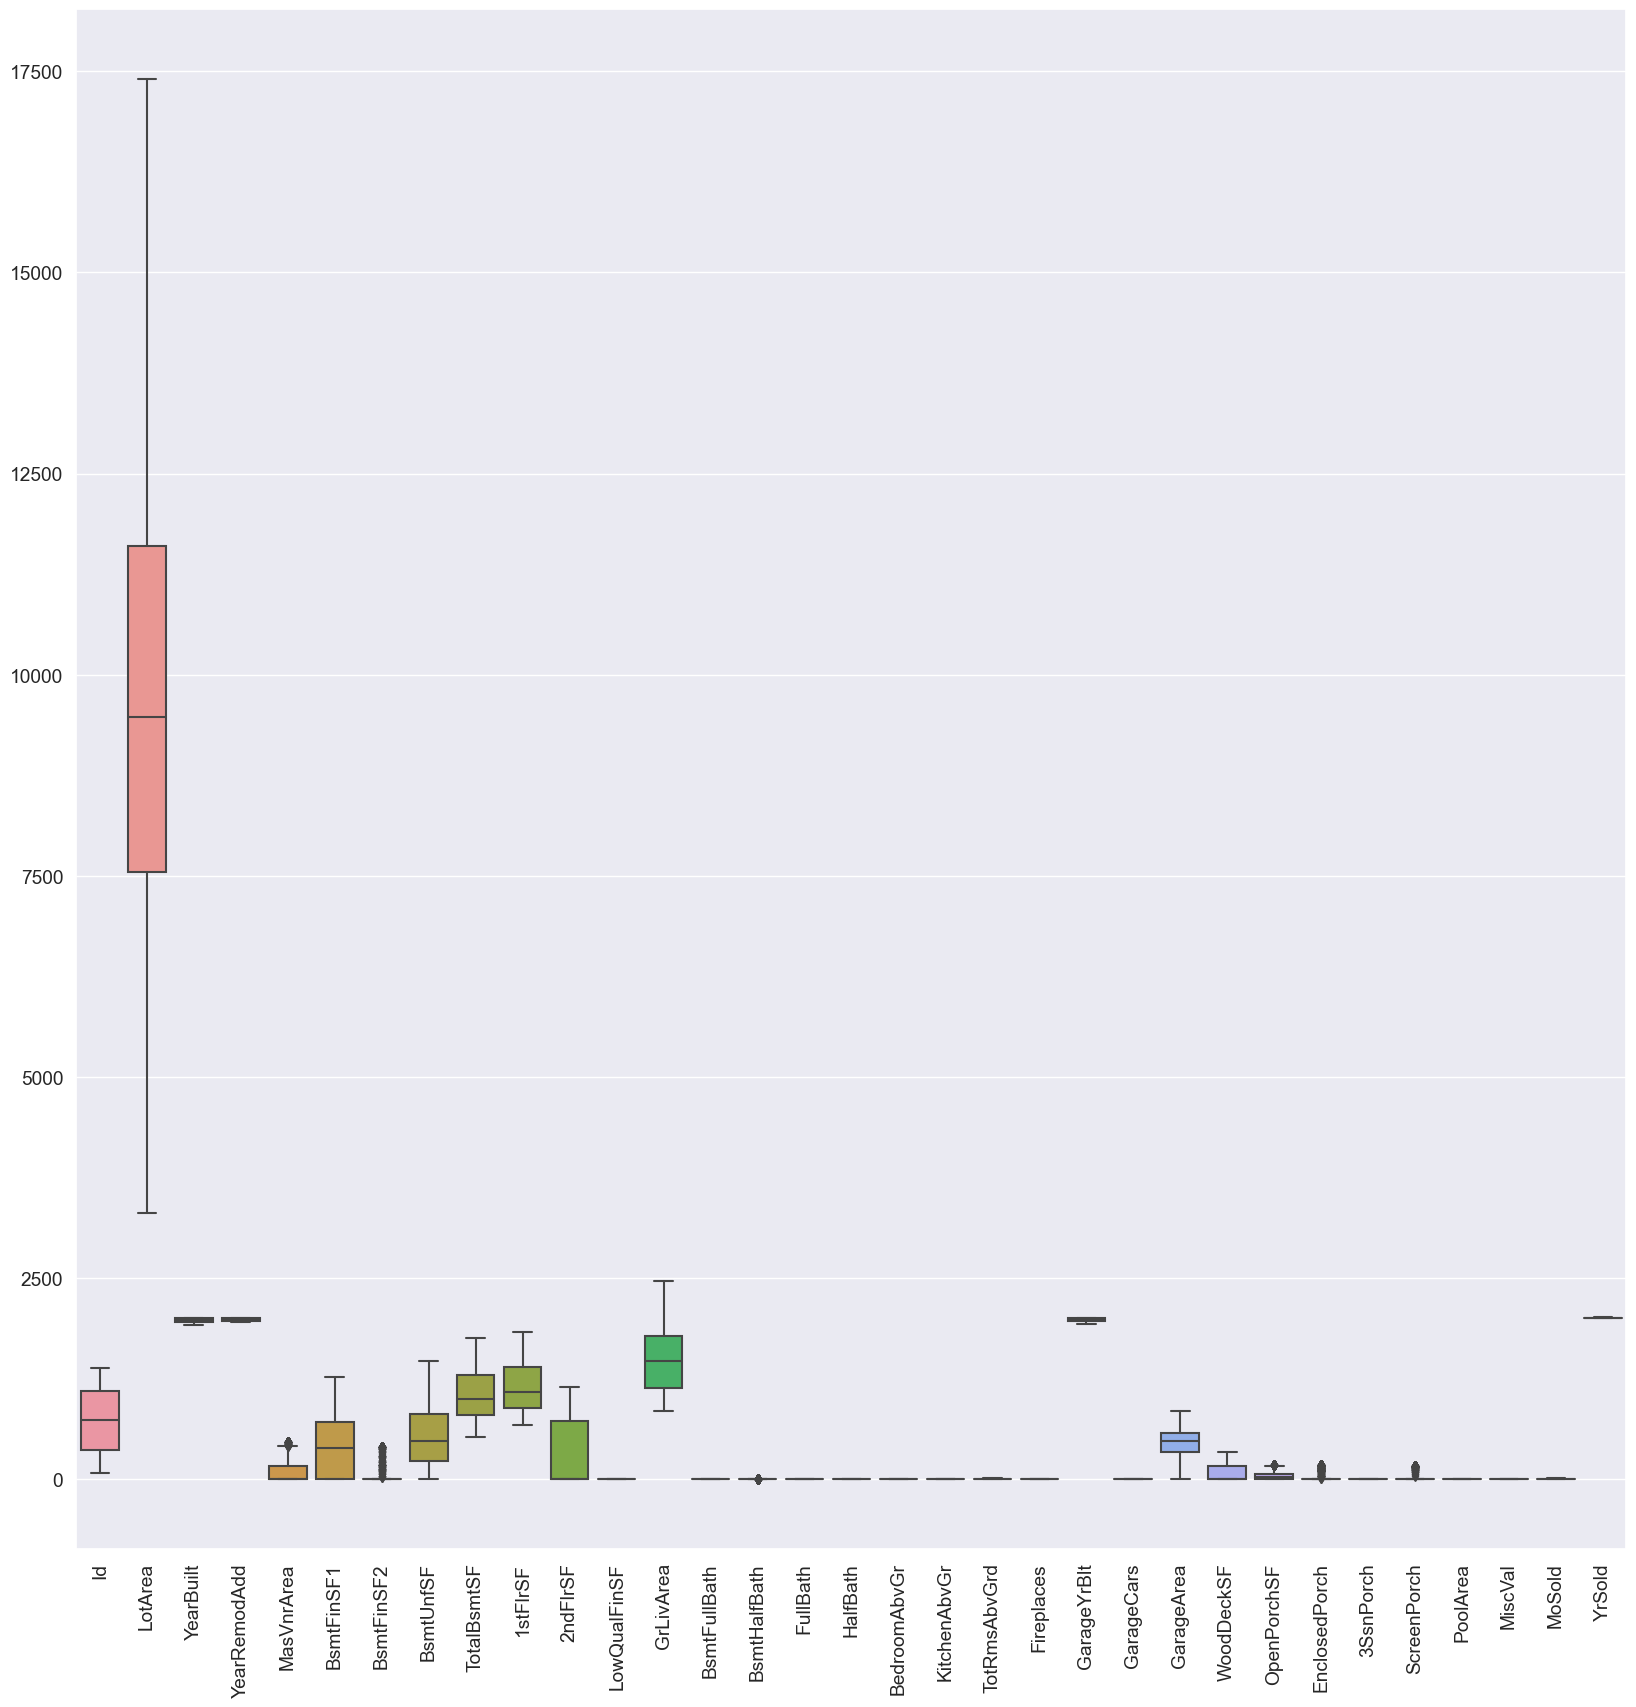

In [32]:
#plotting the boxplot of numerical features expect SalesPrice to check for outliers
plt.figure(figsize=(20,20))
sns.boxplot(data=housing_data[numerical_features_list_copy])
plt.xticks(rotation=90)
plt.show()

### Data Preparation

In [33]:
#One hot encoding the categorical features
housing_data = pd.get_dummies(housing_data, columns=categorical_features_list, drop_first=True)

In [34]:
#checking the data after one hot encoding
housing_data.head()

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,73.9,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,0,0,0,0,1,0,0,0,1,0
1,73.9,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,73.9,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,0,0,0,0,1,0,0,0,1,0
3,73.9,9550.0,1916.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,0,0,0,0,1,0,0,0,0,0
4,73.9,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,0,0,0,0,1,0,0,0,1,0


In [35]:
#scaling the numerical features
scaler = StandardScaler()
housing_data[numerical_features_list_copy] = scaler.fit_transform(housing_data[numerical_features_list_copy])

We have preprocessed and explored the data. We will now split the data into train and test sets. We will use train set to build the model and test set to evaluate the model.

### Model Building and Evaluation

For the independent variables, we will use only those features which are significant in predicting the price of a house. We will use Lasso regression and Ridge regression to select the features. Lasso regression can shrink the coefficients to zero (remove the feature) and therefore is a good option for feature selection. We will use GridSearchCV to find the best value of alpha. We will use the best value of alpha to build the model.

We will be dropping ID feature as it is not required for model building and Transformed price is the target variable.

In [36]:
#Splitting the data into dependent and independent variables
X = housing_data.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)
y = housing_data["TransformedPrice"]

In [37]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

#### Unregularized Linear Regression

In [38]:
#Building unregularized linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

#printing the training and testing R2 score
print("Training R2 score: ", lr.score(X_train, y_train))
print("Testing R2 score: ", lr.score(X_test, y_test))  

Training R2 score:  0.9491162638179819
Testing R2 score:  -1.5929087365893637e+18


In unregularized linear regression, we can see that the model is overfitting. The training R2 score is 94.5% and the test R2 score is -1.6%. The model is not able to generalize well on unseen data. The model is overfitting on the training data.

### Regularized Linear Regression - Lasso

In [39]:
#Building Lasso regression model
params = {'alpha': np.arange(0.0001, 0.01, 0.001)}
lasso = Lasso()
parameters = params
fold = 5

#Building the grid search model
lasso_regressor = GridSearchCV(estimator=lasso, param_grid=parameters, scoring='neg_mean_absolute_error', cv=fold, verbose=1, return_train_score=True)

#Fitting the grid search model
lasso_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.0001, 0.0011, 0.0021, 0.0031, 0.0041, 0.0051, 0.0061, 0.0071,
       0.0081, 0.0091])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
#Checking the results of grid search model
results = pd.DataFrame(lasso_regressor.cv_results_)
results.head().sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.030586,0.005537,0.005329,0.001270,0.0011,{'alpha': 0.0011},-0.094709,-0.087347,-0.091878,-0.088801,...,-0.089572,0.003377,1,-0.077350,-0.078820,-0.075802,-0.078538,-0.079701,-0.078042,0.001349
0,0.130444,0.027879,0.006892,0.002332,0.0001,{'alpha': 0.0001},-0.108672,-0.087651,-0.098455,-0.097821,...,-0.095051,0.009090,2,-0.059654,-0.066176,-0.061738,-0.065014,-0.067229,-0.063962,0.002835
2,0.051828,0.014552,0.009940,0.003124,0.0021,{'alpha': 0.0021},-0.100534,-0.092184,-0.100156,-0.095540,...,-0.096154,0.003627,3,-0.085827,-0.088481,-0.087396,-0.088324,-0.089328,-0.087871,0.001192
3,0.063808,0.012071,0.013278,0.002831,0.0031,{'alpha': 0.0031},-0.106729,-0.098483,-0.107229,-0.099968,...,-0.101926,0.004219,4,-0.093013,-0.096965,-0.095504,-0.095599,-0.096313,-0.095479,0.001342
4,0.047993,0.005288,0.015358,0.003196,0.0041,{'alpha': 0.0041},-0.109559,-0.103262,-0.111216,-0.105315,...,-0.106068,0.003819,5,-0.098415,-0.101887,-0.100672,-0.102063,-0.101640,-0.100935,0.001349


In [41]:
#Finding the best parameters
print("Best parameters: ", lasso_regressor.best_params_)

Best parameters:  {'alpha': 0.0011}


In [42]:
#building the lasso model with best parameters
lasso = Lasso(alpha=0.0011)
lasso.fit(X_train, y_train)

#printing the training and testing R2 score
print("Training R2 score: ", lasso.score(X_train, y_train))
print("Testing R2 score: ", lasso.score(X_test, y_test))

Training R2 score:  0.9094898303053927
Testing R2 score:  0.893729926063314


The optimal value of alpha for Lasso regression is 0.0011. The training R2 score is 90.9% and the test R2 score is 89.3%. The model is able to generalize well on unseen data. The model is not overfitting on the training data.

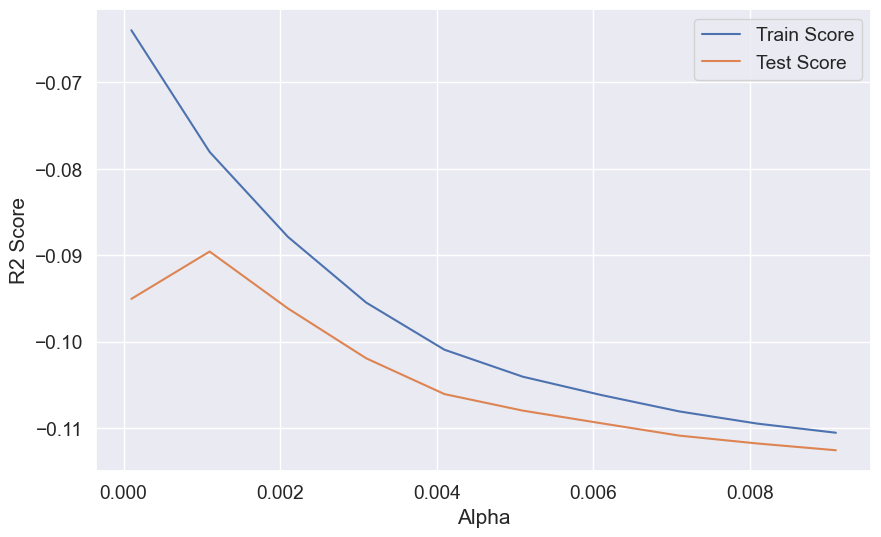

In [43]:
#plotting the R2 score vs alpha values of lasso model
plt.figure(figsize=(10,6))
plt.plot(results['param_alpha'], results['mean_train_score'], label='Train Score')
plt.plot(results['param_alpha'], results['mean_test_score'], label='Test Score')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

As seen from the above plot, the R2 score for test data is highest for alpha = 0.0011 and descreses as alpha increases. The R2 score for training data decreases as alpha increases. The model is not overfitting on the training data.

In [44]:
#Checking the top 10 features of lasso model
lasso_features = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso.coef_})
lasso_features.sort_values(by='Coefficient', ascending=False).head(10)

,Feature,Coefficient
123,OverallQual_9,0.155713
11,GrLivArea,0.114232
124,OverallQual_10,0.109707
235,Functional_Typ,0.081746
147,Exterior1st_BrkFace,0.080190
278,SaleType_New,0.068556
87,Neighborhood_StoneBr,0.063480
81,Neighborhood_NridgHt,0.062741
71,Neighborhood_Crawfor,0.061600
122,OverallQual_8,0.059924


The top 10 features which are significant in predicting the price of a house as per Lasso regression are:
1. OverallQual_9
2. GrLivArea
3. OverallQual_10
4. Functional_Typ
5. Exterior1st_BrkFace
6. SaleType_New
7. Neighborhood_StoneBr
8. Neighborhood_NridgHt
9. Neighborhood_Crawfor
10. OverallQual_8

In [45]:
#To interpret the coefficients of lasso model in terms of target variable, we need to apply inverse log transformation since we applied log transformation to the target variable
lasso_features['Coefficient'] = np.exp(lasso_features['Coefficient'])
lasso_features.sort_values(by='Coefficient', ascending=False).head(10)

,Feature,Coefficient
123,OverallQual_9,1.168491
11,GrLivArea,1.121012
124,OverallQual_10,1.115951
235,Functional_Typ,1.085180
147,Exterior1st_BrkFace,1.083493
278,SaleType_New,1.070960
87,Neighborhood_StoneBr,1.065539
81,Neighborhood_NridgHt,1.064751
71,Neighborhood_Crawfor,1.063536
122,OverallQual_8,1.061756


### Regularized Linear Regression - Ridge

In [46]:
#Building Ridge regression model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
ridge = Ridge()

ridge_regressor = GridSearchCV(estimator=ridge, param_grid=params, scoring='r2', cv=5, verbose=1, return_train_score=True)
ridge_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [47]:
#Checking the results of grid search model
results = pd.DataFrame(ridge_regressor.cv_results_)
results.head().sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.016386,0.002050,0.005797,0.001833,0.1,{'alpha': 0.1},0.783660,0.863110,0.734110,0.845358,...,0.825483,0.059394,23,0.956391,0.950868,0.957845,0.952766,0.948584,0.953291,0.003425
3,0.016191,0.002491,0.005196,0.001164,0.05,{'alpha': 0.05},0.771815,0.852517,0.718856,0.841619,...,0.816648,0.063517,25,0.956843,0.952293,0.958655,0.954413,0.950166,0.954474,0.003047
2,0.015792,0.001720,0.004797,0.000748,0.01,{'alpha': 0.01},0.755932,0.824349,0.695417,0.828659,...,0.799461,0.067722,26,0.957130,0.953535,0.959367,0.956177,0.951734,0.955589,0.002686
1,0.020389,0.005385,0.006596,0.001854,0.001,{'alpha': 0.001},0.744606,0.808679,0.685507,0.820055,...,0.789778,0.069627,27,0.957169,0.953664,0.959455,0.956414,0.951925,0.955725,0.002652
0,0.030583,0.010004,0.009194,0.001599,0.0001,{'alpha': 0.0001},0.742260,0.806669,0.684269,0.818875,...,0.788347,0.069983,28,0.957170,0.953666,0.959456,0.956418,0.951927,0.955727,0.002651


In [48]:
#Finding the best parameters
print("Best parameters: ", ridge_regressor.best_params_)

Best parameters:  {'alpha': 10.0}


In [49]:
#building the ridge model with best parameters
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

#printing the training and testing R2 score
print("Training R2 score: ", ridge.score(X_train, y_train))
print("Testing R2 score: ", ridge.score(X_test, y_test))

Training R2 score:  0.9266642638768537
Testing R2 score:  0.8941285858307557


The optimal value of alpha for Ridge regression is 10. The training R2 score is 92.6% and the test R2 score is 89.4%. The model is able to generalize well on unseen data. The model is not overfitting on the training data.

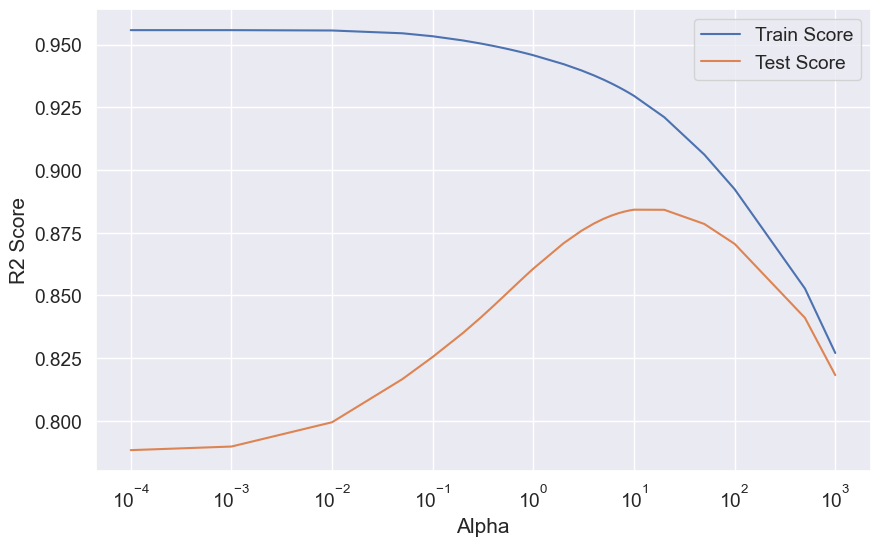

In [50]:
#plotting the R2 score vs alpha values of ridge model
plt.figure(figsize=(10,6))
plt.plot(results['param_alpha'], results['mean_train_score'], label='Train Score')
plt.plot(results['param_alpha'], results['mean_test_score'], label='Test Score')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()

The above plot shows that when alpha is low, the model was overfitting on the training data. As alpha increases, the R2 score of training data decreases and R2 score of test data increases. The highest R2 score for test data is for alpha = 10. 

In [51]:
#checking the top 10 features of ridge model
ridge_features = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge.coef_})
ridge_features.sort_values(by='Coefficient', ascending=False).head(10)

,Feature,Coefficient
123,OverallQual_9,0.096518
87,Neighborhood_StoneBr,0.091528
132,OverallCond_9,0.080452
147,Exterior1st_BrkFace,0.079996
124,OverallQual_10,0.079504
11,GrLivArea,0.076700
81,Neighborhood_NridgHt,0.074047
235,Functional_Typ,0.070609
71,Neighborhood_Crawfor,0.060690
46,MSZoning_FV,0.059740


The top 10 features which are significant in predicting the price of a house as per Ridge regression are:
1. OverallQual_9
2. Neighborhood_StoneBr
3. OverallCond_9
4. Exterior1st_BrkFace
5. OverallQual_10
6. GrLivArea
7. Neighborhood_NridgHt
8. Functional_Typ
9. Neighborhood_Crawfor
10. MSZoning_FV


In [52]:
# To interpret the coefficients of ridge model in terms of target variable, we need to apply inverse log transformation since we applied log transformation to the target variable
ridge_features['Coefficient'] = np.exp(ridge_features['Coefficient'])
ridge_features.sort_values(by='Coefficient', ascending=False).head(10)

,Feature,Coefficient
123,OverallQual_9,1.101330
87,Neighborhood_StoneBr,1.095848
132,OverallCond_9,1.083776
147,Exterior1st_BrkFace,1.083283
124,OverallQual_10,1.082749
11,GrLivArea,1.079718
81,Neighborhood_NridgHt,1.076858
235,Functional_Typ,1.073162
71,Neighborhood_Crawfor,1.062570
46,MSZoning_FV,1.061561


### Conclusion

The variables which are significant in predicting the price of a house are:
- OverallQual_9, OverallQual_10, and OverallQual_8- Indicates the overall material and finish quality of the house. The houses with high quality material and finish have high price. 
- GrLivArea - Indicates the above grade (ground) living area square feet. The houses with large living area have high price.
- Exterior1st_BrkFace - Indicates the exterior covering on house. The houses with brick face have high price. 
- Functional_Typ - Indicates the home functionality. The houses with typical functionality have high price.
- OverallCond_9 - Indicates the overall condition of the house. The houses with excellent condition have high price.
- Neighborhood_StoneBr, Neighborhood_NridgHt, Neighborhood_Crawfor - Indicates the physical locations of the house. The houses in Stone Brook, Northridge Heights, and Crawford have high price.
- SaleType_New - Indicates the type of sale. The houses with new sale have high price.
- MSZoning_FV - Indicates the general zoning classification of the sale. The houses with floating village residential zoning have high price.


### Subjective Questions

##### Question 1

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [53]:
#Building the ridge model for alpha = 20
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

#printing the training and testing R2 score
print("Training R2 score: ", ridge.score(X_train, y_train))
print("Testing R2 score: ", ridge.score(X_test, y_test))

Training R2 score:  0.9195808060202698
Testing R2 score:  0.8929908242719509


In [54]:
#checking the top 10 features of ridge model
ridge_features = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge.coef_})
ridge_features.sort_values(by='Coefficient', ascending=False).head(10)

,Feature,Coefficient
123,OverallQual_9,0.076542
11,GrLivArea,0.074031
235,Functional_Typ,0.065274
147,Exterior1st_BrkFace,0.065219
87,Neighborhood_StoneBr,0.063667
81,Neighborhood_NridgHt,0.060564
132,OverallCond_9,0.055211
71,Neighborhood_Crawfor,0.052567
124,OverallQual_10,0.050357
284,SaleCondition_Normal,0.049807


In [55]:
#Building the lasso model for alpha = 0.0022
lasso = Lasso(alpha=0.0022)
lasso.fit(X_train, y_train)

#printing the training and testing R2 score
print("Training R2 score: ", lasso.score(X_train, y_train))
print("Testing R2 score: ", lasso.score(X_test, y_test))

Training R2 score:  0.88853133409678
Testing R2 score:  0.8767587842276223


In [56]:
#checking the top 10 features of lasso model
lasso_features = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso.coef_})
lasso_features.sort_values(by='Coefficient', ascending=False).head(10)

,Feature,Coefficient
11,GrLivArea,0.127388
123,OverallQual_9,0.092965
235,Functional_Typ,0.081385
7,TotalBsmtSF,0.063676
222,CentralAir_Y,0.054564
2,YearRemodAdd,0.050917
147,Exterior1st_BrkFace,0.048271
278,SaleType_New,0.042908
1,YearBuilt,0.042187
71,Neighborhood_Crawfor,0.038677


#### Question – 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [57]:
#Lasso Regression
#removing the top 5 features of lasso model from train and test data
X_train_lasso = X_train.drop(['OverallQual_9', 'GrLivArea', 'OverallQual_10', 'Functional_Typ', 'Exterior1st_BrkFace'], axis=1)
X_test_lasso = X_test.drop(['OverallQual_9', 'GrLivArea', 'OverallQual_10', 'Functional_Typ', 'Exterior1st_BrkFace'], axis=1)

#building the lasso model with best parameters
lasso = Lasso(alpha=0.0011)
lasso.fit(X_train_lasso, y_train)

#printing the training and testing R2 score
print("Training R2 score: ", lasso.score(X_train_lasso, y_train))
print("Testing R2 score: ", lasso.score(X_test_lasso, y_test))

Training R2 score:  0.9027214948908173
Testing R2 score:  0.8892275551039991


In [58]:
#checking the top 5 features of lasso model
lasso_features = pd.DataFrame({'Feature': X_train_lasso.columns, 'Coefficient': lasso.coef_})
lasso_features.sort_values(by='Coefficient', ascending=False).head(5)

,Feature,Coefficient
86,Neighborhood_StoneBr,0.106699
80,Neighborhood_NridgHt,0.097511
9,2ndFlrSF,0.090733
7,TotalBsmtSF,0.066868
8,1stFlrSF,0.065647


In [59]:
#Ridge Regression
#removing the top 5 features of ridge model from train and test data
X_train_ridge = X_train.drop(['OverallQual_9', 'Neighborhood_StoneBr', 'OverallCond_9', 'Exterior1st_BrkFace', 'OverallQual_10'], axis=1)
X_test_ridge = X_test.drop(['OverallQual_9', 'Neighborhood_StoneBr', 'OverallCond_9', 'Exterior1st_BrkFace', 'OverallQual_10'], axis=1)

#building the ridge model with best parameters
ridge = Ridge(alpha=10)
ridge.fit(X_train_ridge, y_train)

#printing the training and testing R2 score
print("Training R2 score: ", ridge.score(X_train_ridge, y_train))
print("Testing R2 score: ", ridge.score(X_test_ridge, y_test))

Training R2 score:  0.9214128826901358
Testing R2 score:  0.8906274265164016


In [60]:
#checking the top 5 features of ridge model
ridge_features = pd.DataFrame({'Feature': X_train_ridge.columns, 'Coefficient': ridge.coef_})
ridge_features.sort_values(by='Coefficient', ascending=False).head(5)

,Feature,Coefficient
11,GrLivArea,0.076809
230,Functional_Typ,0.074510
81,Neighborhood_NridgHt,0.070010
46,MSZoning_FV,0.059327
56,LandContour_HLS,0.059224
